In [1]:
import os
import zipfile
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import matplotlib.pyplot as plt

In [ ]:
#!rm -rf /tmp/dataset
local_zip = '/content/drive/MyDrive/dog_ia/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = './dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_acc",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

# Model definition

In [5]:
from keras.models import Sequential
from keras.layers import Activation,Conv2D,MaxPooling2D,Flatten,Dropout,Dense,MaxPool2D

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(120))
model.add(Activation('softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

# DATA GEN
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)
                                   
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=100,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(50,50),
        batch_size=100,
        class_mode='categorical')

histor = model.fit(train_generator, epochs=100, validation_data=validation_generator, verbose=1)

Found 12000 images belonging to 120 classes.
Found 8580 images belonging to 120 classes.
Epoch 1/100
120/120 [==============================] - 154s 1s/step - loss: 4.7958 - acc: 0.0096 - val_loss: 4.7075 - val_acc: 0.0162
Epoch 2/100
120/120 [==============================] - 28s 237ms/step - loss: 4.6827 - acc: 0.0187 - val_loss: 4.5127 - val_acc: 0.0350
Epoch 3/100
120/120 [==============================] - 30s 252ms/step - loss: 4.4839 - acc: 0.0322 - val_loss: 4.3556 - val_acc: 0.0499
Epoch 4/100
120/120 [==============================] - 31s 261ms/step - loss: 4.3213 - acc: 0.0445 - val_loss: 4.2169 - val_acc: 0.0711
Epoch 5/100
120/120 [==============================] - 31s 260ms/step - loss: 4.1688 - acc: 0.0738 - val_loss: 4.2005 - val_acc: 0.0702
Epoch 6/100
120/120 [==============================] - 31s 259ms/step - loss: 4.0612 - acc: 0.0870 - val_loss: 4.1225 - val_acc: 0.0839
Epoch 7/100
120/120 [==============================] - 31s 255ms/step - loss: 3.9373 - acc: 0.103

120/120 [==============================] - 31s 256ms/step - loss: 1.1069 - acc: 0.7159 - val_loss: 4.8303 - val_acc: 0.1251
Epoch 61/100
120/120 [==============================] - 31s 256ms/step - loss: 1.1376 - acc: 0.7094 - val_loss: 6.1045 - val_acc: 0.1364
Epoch 62/100
120/120 [==============================] - 31s 255ms/step - loss: 1.1474 - acc: 0.7118 - val_loss: 5.2319 - val_acc: 0.1323
Epoch 63/100
120/120 [==============================] - 31s 255ms/step - loss: 1.0938 - acc: 0.7220 - val_loss: 7.7027 - val_acc: 0.1373
Epoch 64/100
120/120 [==============================] - 31s 255ms/step - loss: 1.1037 - acc: 0.7222 - val_loss: 8.6752 - val_acc: 0.1371
Epoch 65/100
120/120 [==============================] - 31s 256ms/step - loss: 1.1254 - acc: 0.7166 - val_loss: 7.6451 - val_acc: 0.1385
Epoch 66/100
120/120 [==============================] - 30s 255ms/step - loss: 1.1255 - acc: 0.7212 - val_loss: 5.4068 - val_acc: 0.1265
Epoch 67/100
120/120 [==============================] 

Text(0.5, 1.0, 'Trainnig validation annd loss')

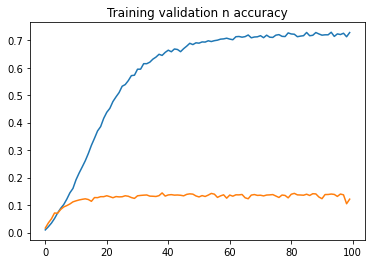

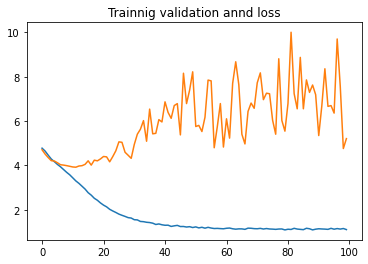

In [8]:
acc = histor.history['acc']
val_acc = histor.history['val_acc']

loss = histor.history['loss']
val_loss = histor.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Training validation n accuracy")

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Trainnig validation annd loss")

In [9]:
model.save("modd.h5")

In [97]:
train_generator.class_indices

{'n02085620-Chihuahua': 0,
 'n02085782-Japanese_spaniel': 1,
 'n02085936-Maltese_dog': 2,
 'n02086079-Pekinese': 3,
 'n02086240-Shih-Tzu': 4,
 'n02086646-Blenheim_spaniel': 5,
 'n02086910-papillon': 6,
 'n02087046-toy_terrier': 7,
 'n02087394-Rhodesian_ridgeback': 8,
 'n02088094-Afghan_hound': 9,
 'n02088238-basset': 10,
 'n02088364-beagle': 11,
 'n02088466-bloodhound': 12,
 'n02088632-bluetick': 13,
 'n02089078-black-and-tan_coonhound': 14,
 'n02089867-Walker_hound': 15,
 'n02089973-English_foxhound': 16,
 'n02090379-redbone': 17,
 'n02090622-borzoi': 18,
 'n02090721-Irish_wolfhound': 19,
 'n02091032-Italian_greyhound': 20,
 'n02091134-whippet': 21,
 'n02091244-Ibizan_hound': 22,
 'n02091467-Norwegian_elkhound': 23,
 'n02091635-otterhound': 24,
 'n02091831-Saluki': 25,
 'n02092002-Scottish_deerhound': 26,
 'n02092339-Weimaraner': 27,
 'n02093256-Staffordshire_bullterrier': 28,
 'n02093428-American_Staffordshire_terrier': 29,
 'n02093647-Bedlington_terrier': 30,
 'n02093754-Border_terr

In [100]:
model.save('cnn_11per.h5')

# THE NEW MODEL DEEP MODEL

In [10]:
import os
import keras
import numpy as np
# Get a ResNet50 model
def resnet50_model(classes=1000, *args, **kwargs):
    # Create an input layer 
    input = keras.layers.Input(shape=(224, 224, 3))
    # Create output layers
    output = keras.layers.ZeroPadding2D(padding=3, name='padding_conv1')(input)
    output = keras.layers.Conv2D(64, (7, 7), strides=(2, 2), use_bias=False, name='conv1')(output)
    output = keras.layers.BatchNormalization(axis=3, epsilon=1e-5, name='bn_conv1')(output)
    output = keras.layers.Activation('relu', name='conv1_relu')(output)
    output = keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='pool1')(output)
    output = conv_block(output, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    output = identity_block(output, 3, [64, 64, 256], stage=2, block='b')
    output = identity_block(output, 3, [64, 64, 256], stage=2, block='c')
    output = conv_block(output, 3, [128, 128, 512], stage=3, block='a')
    output = identity_block(output, 3, [128, 128, 512], stage=3, block='b')
    output = identity_block(output, 3, [128, 128, 512], stage=3, block='c')
    output = identity_block(output, 3, [128, 128, 512], stage=3, block='d')
    output = conv_block(output, 3, [256, 256, 1024], stage=4, block='a')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='b')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='c')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='d')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='e')
    output = identity_block(output, 3, [256, 256, 1024], stage=4, block='f')
    output = conv_block(output, 3, [512, 512, 2048], stage=5, block='a')
    output = identity_block(output, 3, [512, 512, 2048], stage=5, block='b')
    output = identity_block(output, 3, [512, 512, 2048], stage=5, block='c')
    output = keras.layers.GlobalAveragePooling2D(name='pool5')(output)
    output = keras.layers.Dense(classes, activation='softmax', name='fc1000')(output)
    # Create a model from input layer and output layers
    model = keras.models.Model(inputs=input, outputs=output, *args, **kwargs)
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    # Return a model
    return model
# Create an identity block
def identity_block(input, kernel_size, filters, stage, block):
    # Variables
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    # Create layers
    output = keras.layers.Conv2D(filters1, (1, 1), kernel_initializer='he_normal', name=conv_name_base + '2a')(input)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2a')(output)
    output = keras.layers.Activation('relu')(output)
    output = keras.layers.Conv2D(filters2, kernel_size, padding='same', kernel_initializer='he_normal', name=conv_name_base + '2b')(output)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2b')(output)
    output = keras.layers.Activation('relu')(output)
    output = keras.layers.Conv2D(filters3, (1, 1), kernel_initializer='he_normal', name=conv_name_base + '2c')(output)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2c')(output)
    output = keras.layers.add([output, input])
    output = keras.layers.Activation('relu')(output)
    # Return a block
    return output
# Create a convolution block
def conv_block(input, kernel_size, filters, stage, block, strides=(2, 2)):
    # Variables
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    # Create block layers
    output = keras.layers.Conv2D(filters1, (1, 1), strides=strides, kernel_initializer='he_normal', name=conv_name_base + '2a')(input)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2a')(output)
    output = keras.layers.Activation('relu')(output)
    output = keras.layers.Conv2D(filters2, kernel_size, padding='same', kernel_initializer='he_normal', name=conv_name_base + '2b')(output)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2b')(output)
    output = keras.layers.Activation('relu')(output)
    output = keras.layers.Conv2D(filters3, (1, 1), kernel_initializer='he_normal', name=conv_name_base + '2c')(output)
    output = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '2c')(output)
    shortcut = keras.layers.Conv2D(filters3, (1, 1), strides=strides, kernel_initializer='he_normal', name=conv_name_base + '1')(input)
    shortcut = keras.layers.BatchNormalization(axis=3, name=bn_name_base + '1')(shortcut)
    output = keras.layers.add([output, shortcut])
    output = keras.layers.Activation('relu')(output)
    # Return a block
    return output

In [12]:
epochs = 70
batch_size = 32
train_samples = 12000
validation_samples = 8580
img_width, img_height = 224, 224

model = resnet50_model(120)

In [13]:
train_data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True)
# Create a data generator for validation
validation_data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True)
# Create a train generator
train_generator = train_data_generator.flow_from_directory( 
    train_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=True,
    class_mode='categorical',
    seed=42)
# Create a test generator
validation_generator = validation_data_generator.flow_from_directory( 
    validation_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=True,
    class_mode='categorical',
    seed=42)

Found 12000 images belonging to 120 classes.
Found 8580 images belonging to 120 classes.


In [15]:
historyy = model.fit( 
    train_generator, 
    steps_per_epoch=train_samples // batch_size, 
    validation_data=validation_generator, 
    validation_steps=validation_samples // batch_size,
    epochs=epochs,
    verbose=1)

Epoch 1/70
375/375 [==============================] - 229s 609ms/step - loss: 4.4998 - accuracy: 0.0312 - val_loss: 5.3726 - val_accuracy: 0.0077
Epoch 2/70
375/375 [==============================] - 228s 607ms/step - loss: 4.3875 - accuracy: 0.0406 - val_loss: 6.0164 - val_accuracy: 0.0082
Epoch 3/70
375/375 [==============================] - 227s 604ms/step - loss: 4.2668 - accuracy: 0.0514 - val_loss: 5.2984 - val_accuracy: 0.0155
Epoch 4/70
375/375 [==============================] - 230s 612ms/step - loss: 4.2030 - accuracy: 0.0578 - val_loss: 6.3927 - val_accuracy: 0.0543
Epoch 5/70
375/375 [==============================] - 230s 612ms/step - loss: 4.0637 - accuracy: 0.0727 - val_loss: 4.4529 - val_accuracy: 0.0471
Epoch 6/70
375/375 [==============================] - 231s 616ms/step - loss: 3.9249 - accuracy: 0.0917 - val_loss: 39.9914 - val_accuracy: 0.0091
Epoch 7/70
375/375 [==============================] - 231s 615ms/step - loss: 3.8442 - accuracy: 0.1067 - val_loss: 4.4323 

KeyboardInterrupt: 